In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# 재현 가능한 난수 생성
np.random.seed(0)
tf.random.set_seed(0)

def load_data():
    n = 2000
    split = 0.8
    n_train = (int)(split*n)
    
    y = np.random.randint(28, size=(n,2))
    x = np.empty((n,28,28))
    
    for i in tqdm(range(n)):
        img = np.zeros((28,28))
        cv2.circle(img, (y[i][0],y[i][1]), 3, 255, -1)
        x[i] = img
    return ((x[:n_train], y[:n_train]), (x[n_train:], y[n_train:]))

def label(y):
    return np.around(y).astype('int')
        
(x_train, y_train), (x_test, y_test) = load_data()

# normalize image
x_train = x_train/255.
x_test = x_test/255.


100%|███████████████████████████████████| 2000/2000 [00:00<00:00, 268280.93it/s]


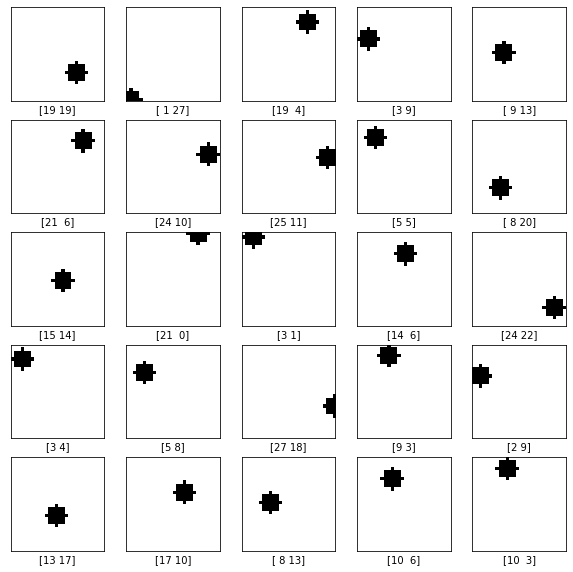

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(str(label(y_test[i])))
plt.show()

In [169]:
def pos_accuracy(y_true, y_pred):
    print(len(y_true))
    label_true = tf.round(y_true)
    label_pred = tf.round(y_pred)
    is_correct = tf.reduce_all(label_true == label_pred, axis=1)
    is_correct = tf.cast(is_correct, 'float32')
    score = tf.reduce_mean(is_correct)
    return score

In [174]:
input_layer = Input((28, 28))
x = Flatten()(input_layer)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
output_layer = Dense(2, activation = None)(x)
model = Model(input_layer, output_layer)

summary_list = []
model.summary(print_fn=lambda x: summary_list.append(x))
ans10 = summary_list

In [179]:
from tensorflow.keras.layers import Reshape, Conv2D, MaxPooling2D
input_layer = Input((28, 28))
x = Reshape((28,28,1))(input_layer)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(32, activation = 'relu')(x)
output_layer = Dense(2, activation = None)(x)
model = Model(input_layer, output_layer)

summary_list = []
model.summary(print_fn=lambda x: summary_list.append(x))
ans10 = summary_list

In [180]:
ans10

['Model: "model_32"',
 '_________________________________________________________________',
 'Layer (type)                 Output Shape              Param #   ',
 '=================================================================',
 'input_33 (InputLayer)        [(None, 28, 28)]          0         ',
 '_________________________________________________________________',
 'reshape_26 (Reshape)         (None, 28, 28, 1)         0         ',
 '_________________________________________________________________',
 'conv2d_91 (Conv2D)           (None, 28, 28, 32)        320       ',
 '_________________________________________________________________',
 'conv2d_92 (Conv2D)           (None, 28, 28, 64)        18496     ',
 '_________________________________________________________________',
 'conv2d_93 (Conv2D)           (None, 28, 28, 64)        36928     ',
 '_________________________________________________________________',
 'conv2d_94 (Conv2D)           (None, 28, 28, 64)        36928     '

In [183]:
#model.compile(optimizer=SGD(learning_rate=0.001), loss='mse', metrics=[pos_accuracy])
model.compile(optimizer='adam', loss='mse', metrics=[pos_accuracy])
#model.compile(optimizer='sgd', loss='mse')

In [184]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 64, epochs=200)

Epoch 1/200
64
64
25/25 [==============================] - 1s 11ms/step - loss: 1.7948 - pos_accuracy: 0.1825 - val_loss: 0.2507 - val_pos_accuracy: 0.4509
Epoch 2/200
25/25 [==============================] - 0s 8ms/step - loss: 0.1229 - pos_accuracy: 0.7625 - val_loss: 0.0544 - val_pos_accuracy: 0.9911
Epoch 3/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0199 - pos_accuracy: 0.9956 - val_loss: 0.0094 - val_pos_accuracy: 0.9955
Epoch 4/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0048 - pos_accuracy: 0.9994 - val_loss: 0.0062 - val_pos_accuracy: 0.9955
Epoch 5/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0028 - pos_accuracy: 1.0000 - val_loss: 0.0045 - val_pos_accuracy: 0.9955
Epoch 6/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0022 - pos_accuracy: 1.0000 - val_loss: 0.0053 - val_pos_accuracy: 0.9955
Epoch 7/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0020 - pos_accuracy: 1.0

25/25 [==============================] - 0s 9ms/step - loss: 0.0062 - pos_accuracy: 1.0000 - val_loss: 0.0101 - val_pos_accuracy: 0.9955
Epoch 109/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0089 - pos_accuracy: 1.0000 - val_loss: 0.0128 - val_pos_accuracy: 0.9955
Epoch 110/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0082 - pos_accuracy: 1.0000 - val_loss: 0.0158 - val_pos_accuracy: 0.9955
Epoch 111/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0080 - pos_accuracy: 1.0000 - val_loss: 0.0054 - val_pos_accuracy: 0.9955
Epoch 112/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0051 - pos_accuracy: 1.0000 - val_loss: 0.0059 - val_pos_accuracy: 0.9955
Epoch 113/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0027 - pos_accuracy: 1.0000 - val_loss: 0.0040 - val_pos_accuracy: 0.9955
Epoch 114/200
25/25 [==============================] - 0s 9ms/step - loss: 0.0017 - pos_accuracy: 1.0000 - v

In [195]:
def pos_accuracy_debug(y_true, y_pred):
    print(y_true.shape)
    label_true = tf.round(y_true)
    label_pred = tf.round(y_pred)
    is_correct = tf.reduce_all(label_true == label_pred, axis=1)
    print(is_correct.shape)
    print(is_correct.numpy())
    is_correct = tf.cast(is_correct, 'float32')
    print(is_correct.numpy())
    score = tf.reduce_mean(is_correct)
    return score

y_true_sample = tf.constant([[10.0, 10.0], [20.0, 20.0]], dtype='float32')
y_pred_sample = tf.constant([[10.0, 10.0], [20.0, 35.5]], dtype='float32')
score = pos_accuracy_debug(y_true_sample, y_pred_sample)
print(score.numpy())

mse = tf.keras.losses.MeanSquaredError()
sample_loss = mse(y_true_sample, y_pred_sample)
print('mse loss =', sample_loss.numpy())
print('manual calc =', 15.5**2 / 4)

(2, 2)
(2,)
[ True False]
[1. 0.]
0.5
mse loss = 60.0625
manual calc = 60.0625


In [109]:
predictions = model.predict(x_test)

In [110]:
def plot_image(i, predictions_array, true_label, img):
    img = img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    true_label = true_label[i]
    predicted_label = label(predictions_array[i])
    if (predicted_label == true_label).all():
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} ({})".format(str(predicted_label),
                                str(true_label)),
                                color=color)


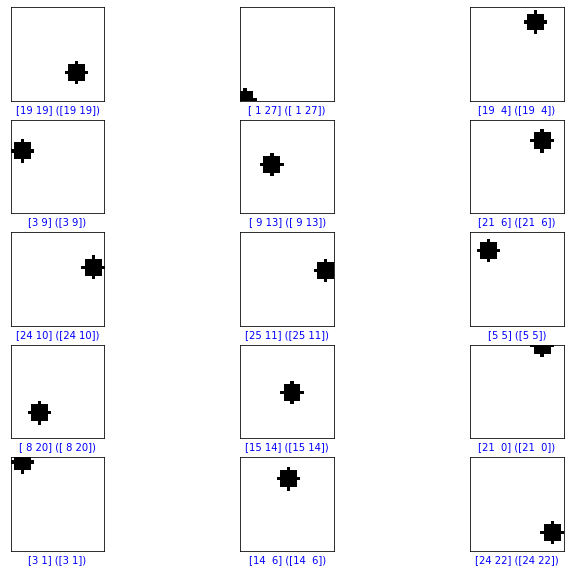

In [111]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)
plt.show()

SSL: CERTIFICATE_VERIFY_FAILED with Python3  

https://blog.minamiland.com/551  
https://hello-bryan.tistory.com/315  


In [199]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [200]:

from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

# URL로부터 이미지 파일 저장

#img_url = 'http://sipi.usc.edu/database/preview/misc/4.2.01.png'
img_url = 'https://data.si.re.kr/sites/default/files/photos6/06K04502Db20093.jpg'
filename = 'seoul.jpg'
#img_url = 'http://data.si.re.kr/photo_ndownload/21555'
#filename = 'seoul.jpg'

img_path = keras.utils.get_file(filename, img_url)
img_path

270336/255049 [===============================] - 0s 0us/step


'/home/kotech/.keras/datasets/seoul.jpg'

In [197]:
!rm /home/kotech/.keras/datasets/seoul.jpg

In [ ]:
print(ans01)
print(ans02)
print(ans03)
print(ans04)
print(ans05)
print(ans06)
print(ans07)
print(ans08)
print(ans09)
print(ans10)
print(ans11)
print(ans12)
print(ans13)
print(ans14)
print(ans15)
print(ans16)
print(ans17)
print(ans18)
print(ans19)
print(ans20)
print(ans21)